# Customer Churn Analysis for a Telecom Company¶

In [3]:
#Importing librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data Set

In [5]:
data = pd.read_csv("C:/Users/Nikhil/Downloads/Customer Churn Analysis Project/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking the various attributes of data like shape (rows and cols), Columns, datatypes

In [7]:
data.shape

(7043, 21)

In [8]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Checking the descriptive statistics of numeric variables

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Insight
#### 1.SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper.
#### 2.75% customers have tenure less than 55 months
#### 3.Average Monthly charges are USD 64.76 whereas 25% customers pay USD 35.50 per month

## Ploting the Bar plot to see the churn values

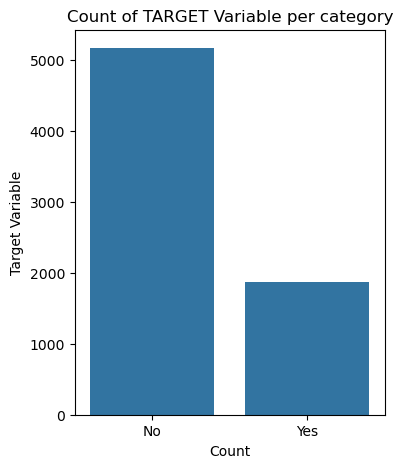

In [14]:
plt.figure(figsize=(4,5))
sns.countplot(data, x = "Churn")
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable per category")
plt.show()

In [15]:
data[["Churn"]].value_counts()

Churn
No       5174
Yes      1869
Name: count, dtype: int64

In [16]:
100*data["Churn"].value_counts()/len(data["Churn"])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

#### insight
#### 1. Data is highly imbalanced, ratio = 73:27
#### 2. So we analyse the data with other features while taking the target values separately to get some insights.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

## # Creating a copy of base data for manupulation & processing

In [21]:
df = data.copy()

In [22]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [23]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [25]:
df.loc[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## Missing Value Treatement

#### Since the % of these records compared to total dataset is very low ie 0.15%,

In [28]:
#Removing missing values
df["TotalCharges"].dropna(inplace=True)

## Filling NAN values with the Mean value of the column

In [30]:
df["TotalCharges"].mean()

2283.3004408418656

In [32]:
df["TotalCharges"].fillna(2283.30,inplace=True)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_7604\2267185167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(2283.30,inplace=True)


## Remove columns not required for processing

In [50]:
# droping column (customerID and tenure) that i dont need.
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

## Plot distibution of individual predictors by churn

## Univariate Analysis

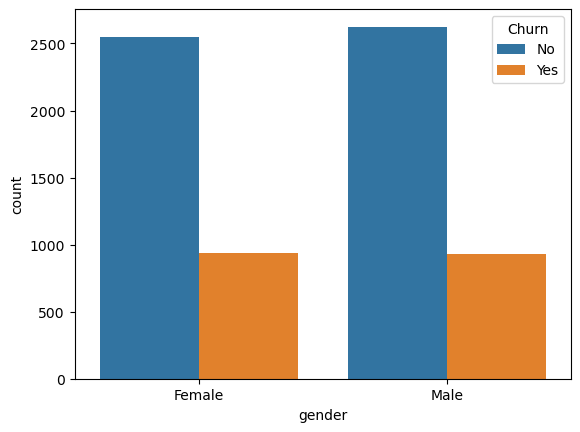

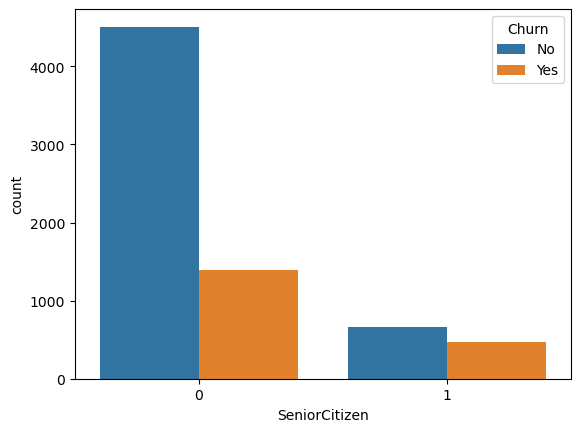

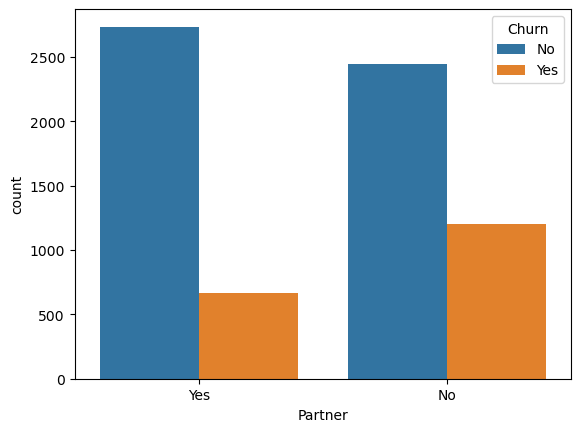

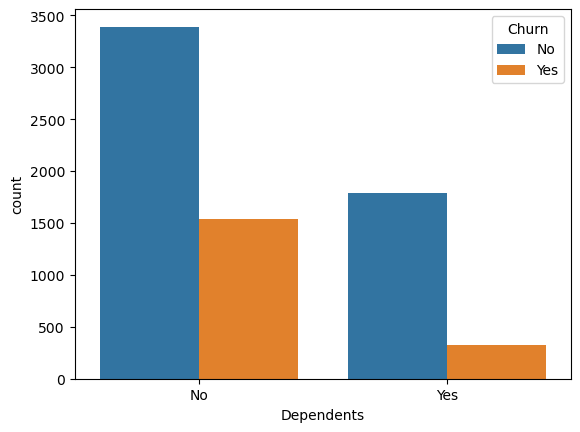

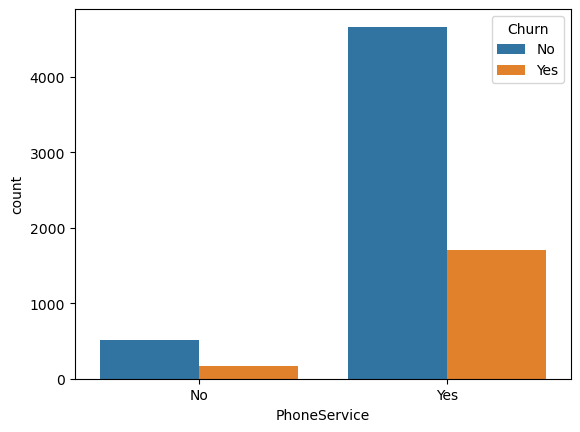

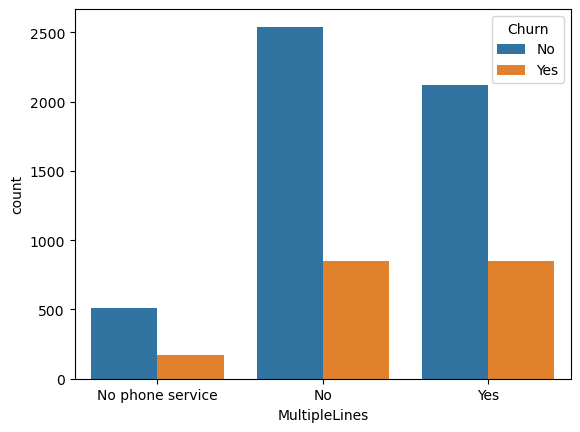

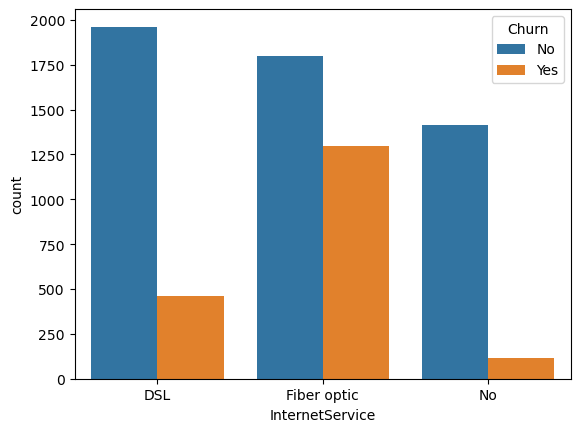

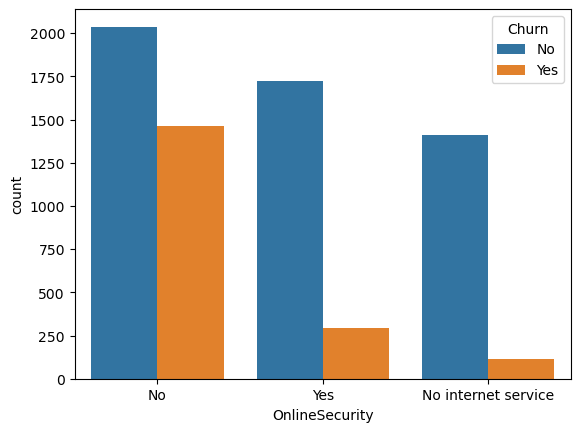

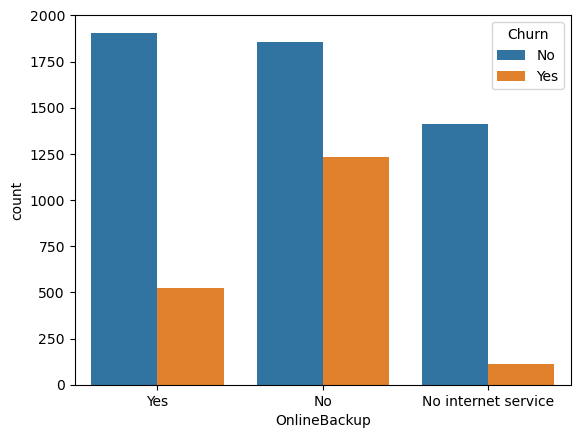

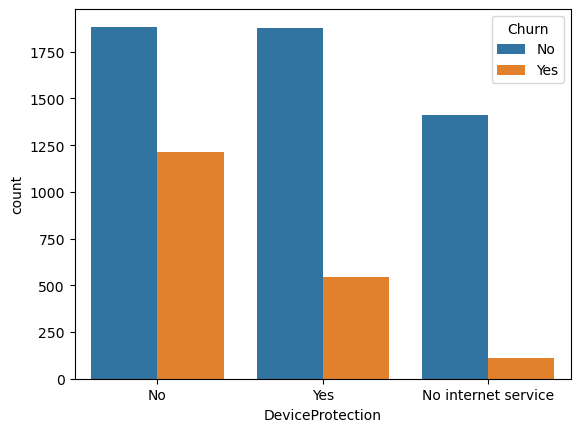

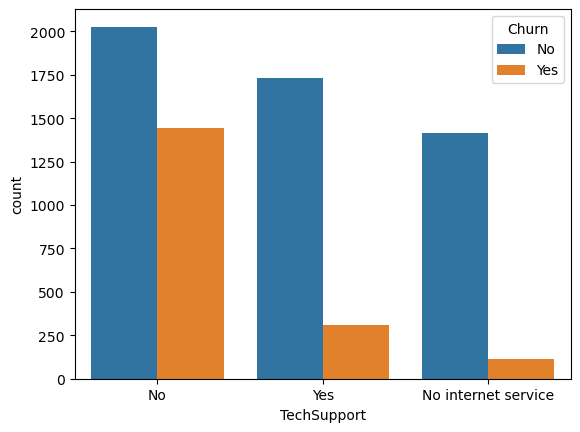

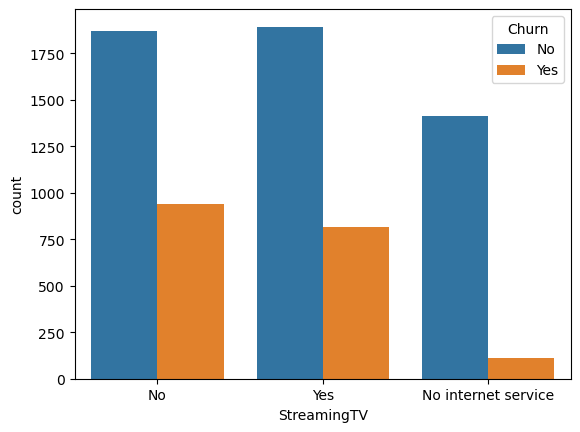

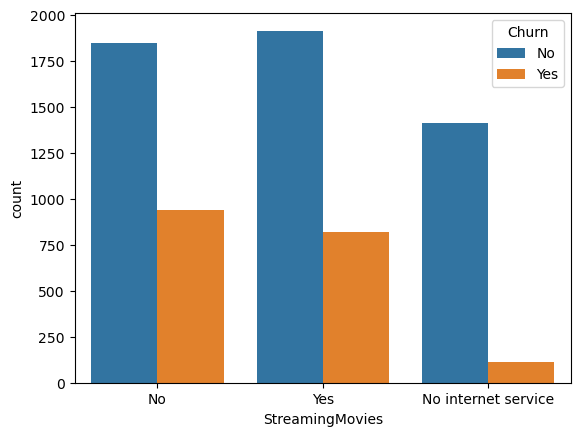

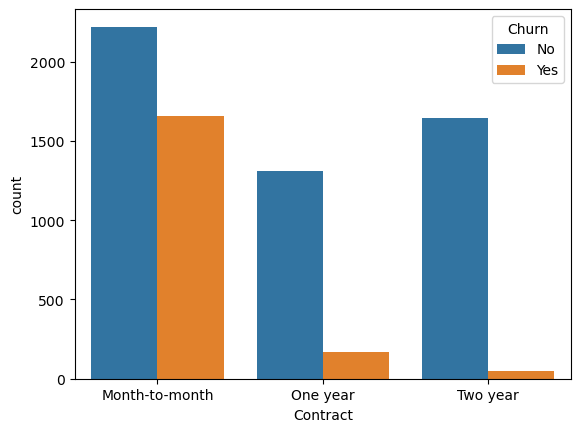

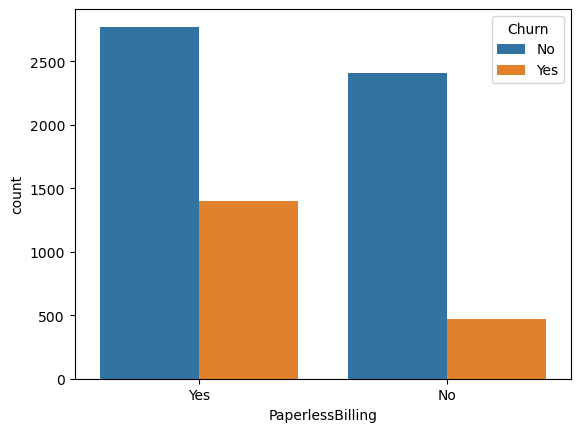

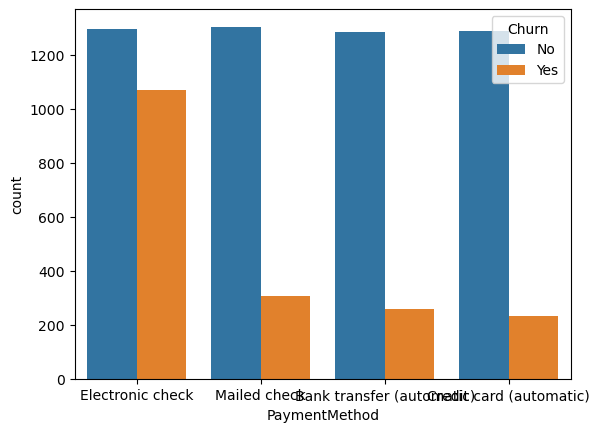

In [55]:
for i, predictor in enumerate (df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
     plt.figure(i)
     sns.countplot(data=df, x=predictor, hue='Churn')

## Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No=0

In [57]:
df["Churn"] = np.where(df.Churn =="No",1,0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,1
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0


## Convert the categorical variables into dummy variables

In [97]:
df_dummies = pd.get_dummies(df).astype(int)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29,29,1,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,56,1889,1,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,53,108,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,42,1840,1,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,70,151,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


## Relationship between Monthly Charges and Total Charges

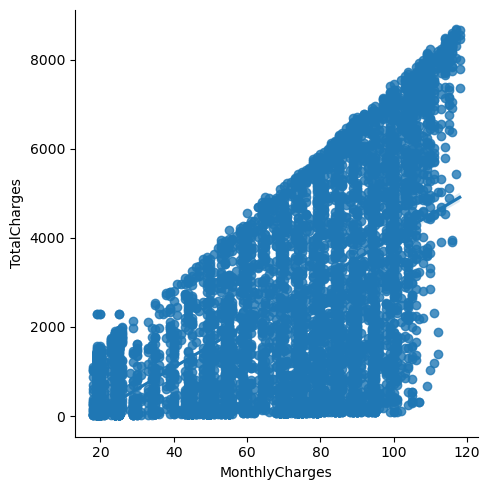

In [100]:
sns.lmplot(df_dummies, x = "MonthlyCharges", y = "TotalCharges")
plt.show()

#### Insight: Total Charges increase as Monthly Charges increase - as expected.¶

## Churn by Monthly Charges and Total Charges

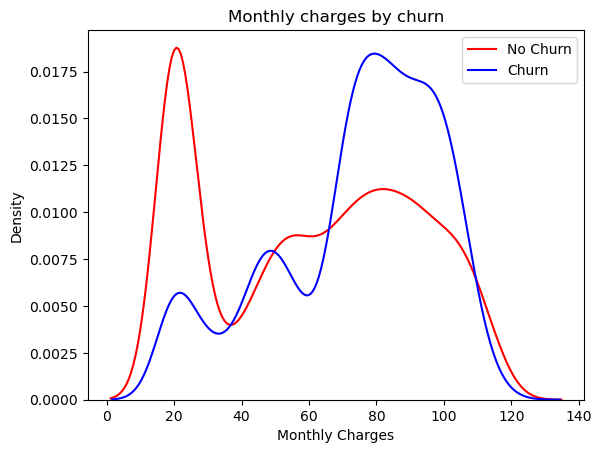

In [104]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1)], color="Red")
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0)],ax =Mth, color="Blue")
plt.legend(["No Churn","Churn"])
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Monthly charges by churn')
plt.show()

#### Insight: Churn is high when Monthly Charges ar high

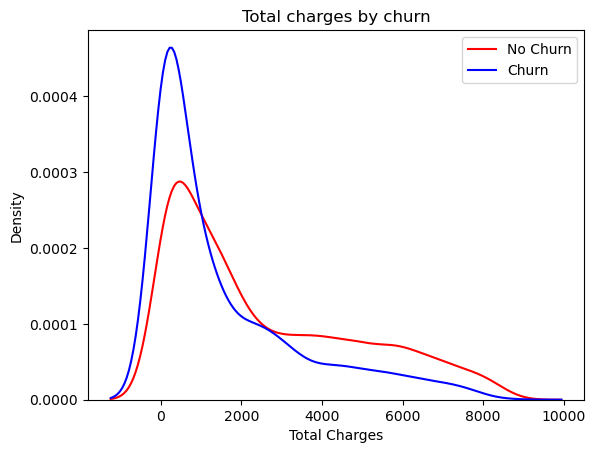

In [106]:
tot = sns.kdeplot(df_dummies.TotalCharges[df_dummies["Churn"] == 1],color="Red")
tot = sns.kdeplot(df_dummies.TotalCharges[df_dummies["Churn"] == 0],color="Blue")
plt.legend(["No Churn","Churn"])
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Total charges by churn')
plt.show()

#### Surprising insight as higher Churn at lower Total Charges
#### However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

## Build a correlation of all predictors with 'Churn'

<Axes: >

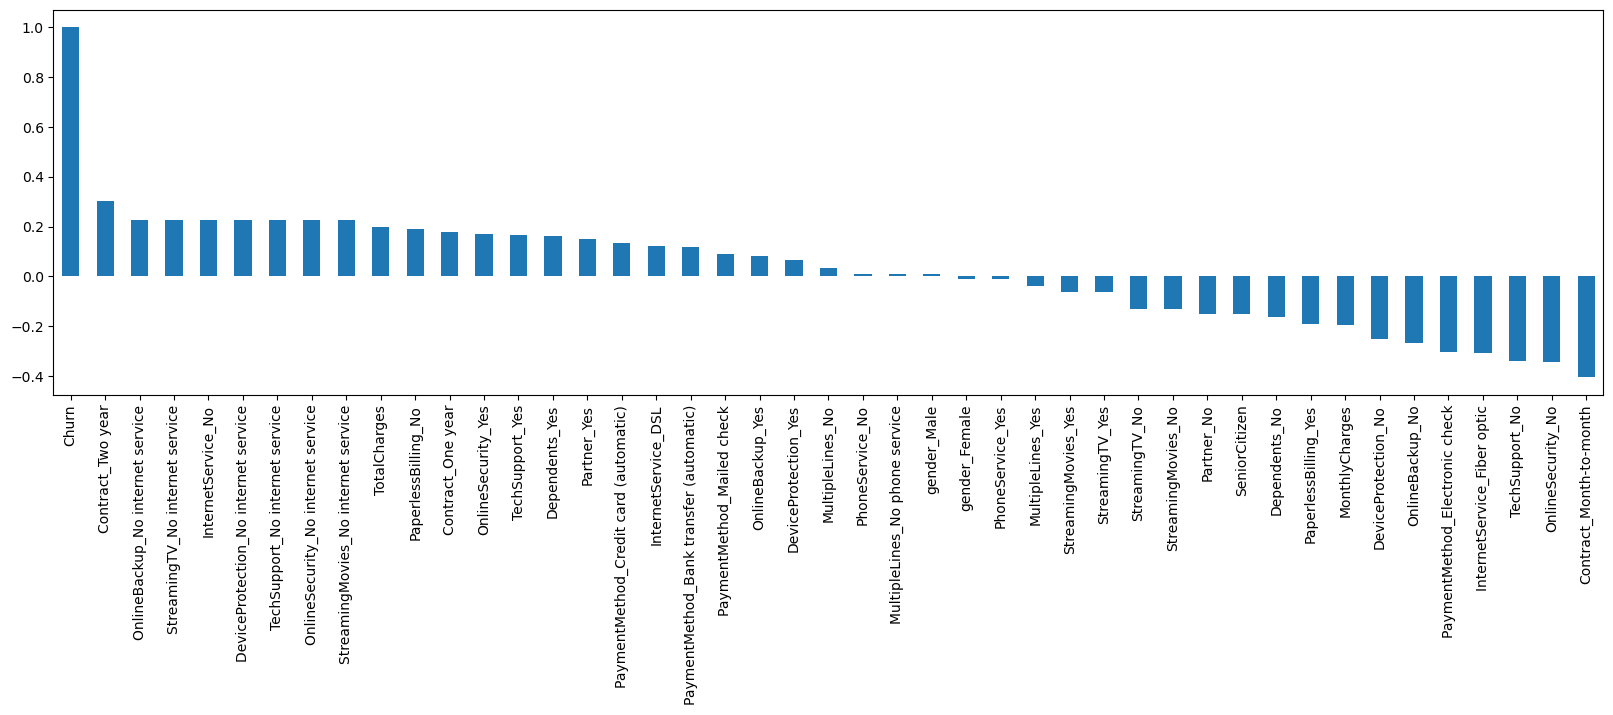

In [109]:
plt.figure(figsize=[20,5])
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### Derived Insight:
#### HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet
#### LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years
#### Factors like Gender, Availability of PhoneService and of multiple lines have alomost NO impact on Churn
## This is also evident from the Heatmap below

<Axes: >

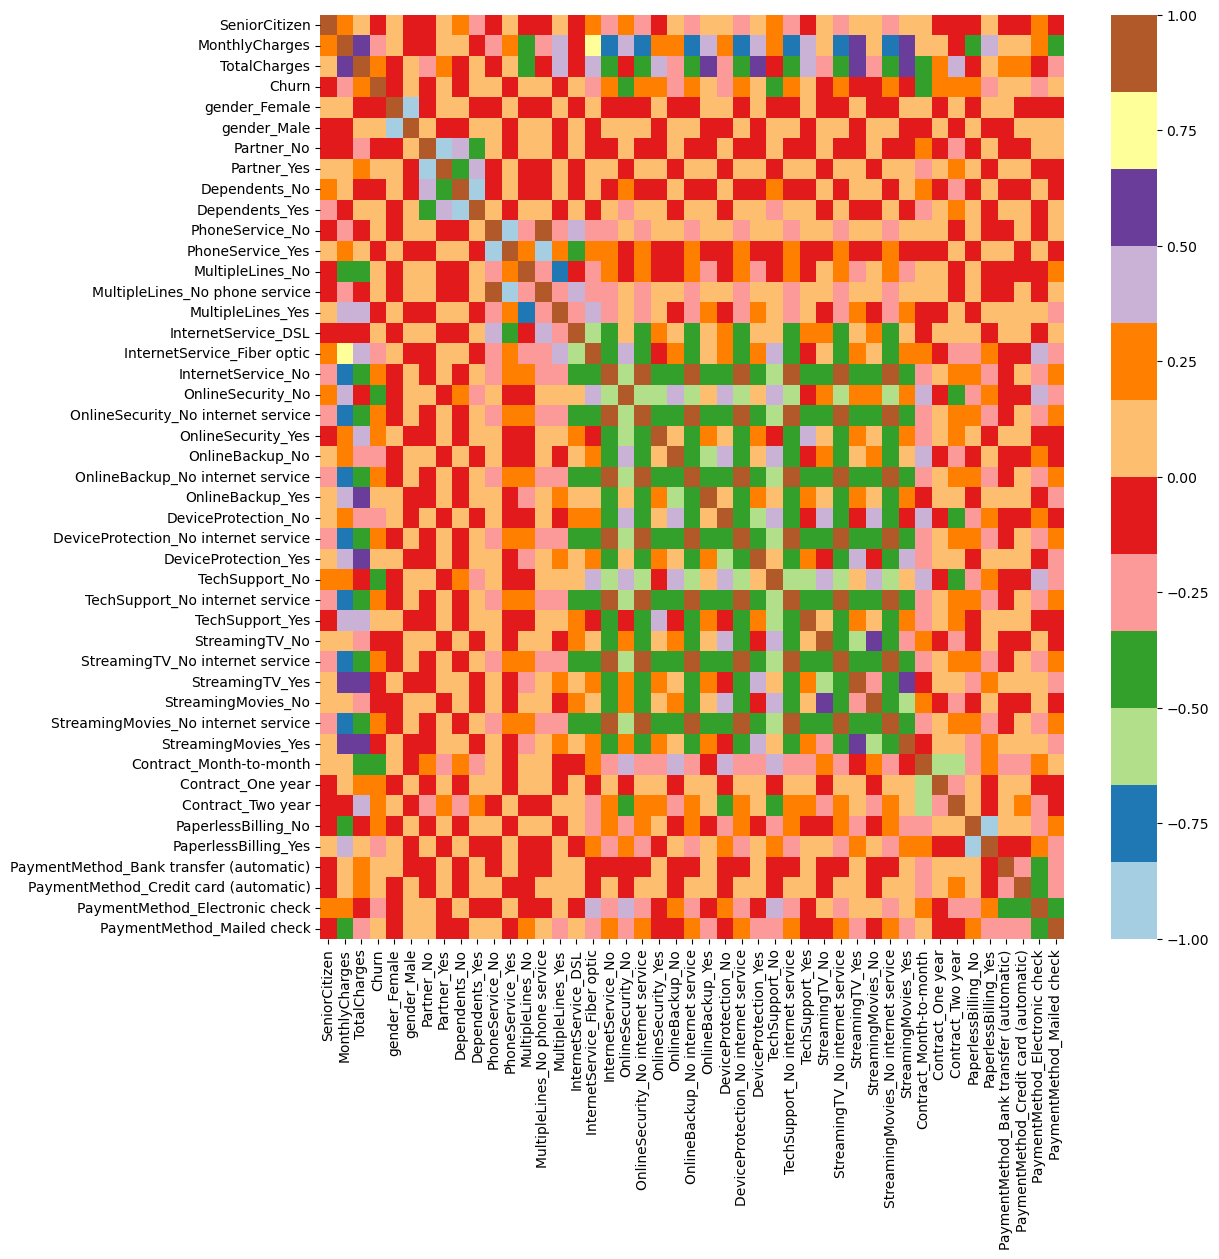

In [111]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

## Bivariate Analysis

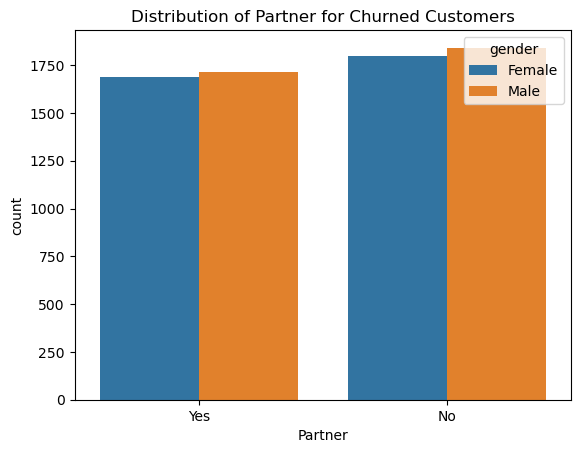

In [113]:
sns.countplot(df, x='Partner',hue='gender')
plt.title('Distribution of Partner for Churned Customers')
plt.show()

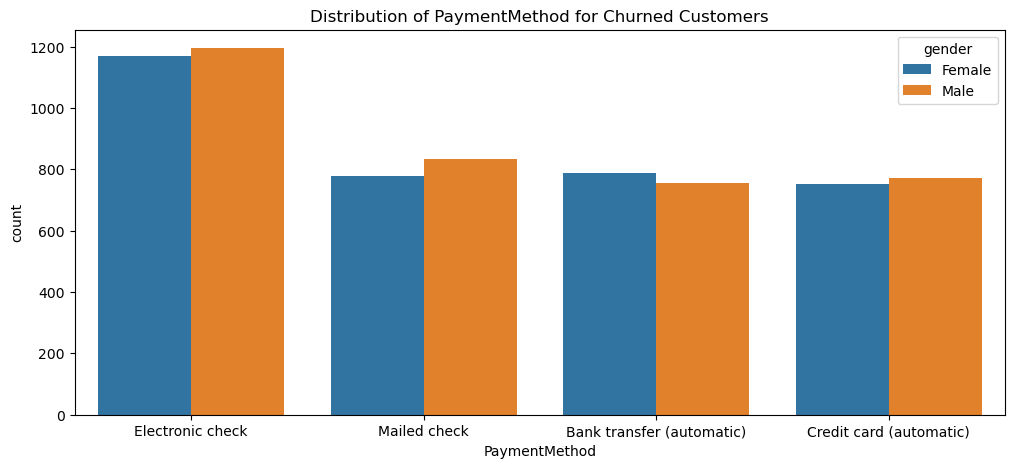

In [114]:
plt.figure(figsize=[12,5])
sns.countplot(df, x='PaymentMethod',hue='gender')
plt.title('Distribution of PaymentMethod for Churned Customers')
plt.show()

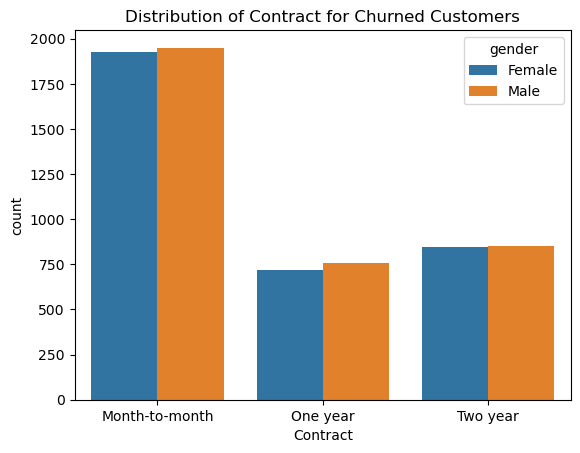

In [116]:
sns.countplot(df, x='Contract',hue='gender')
plt.title('Distribution of Contract for Churned Customers')
plt.show()

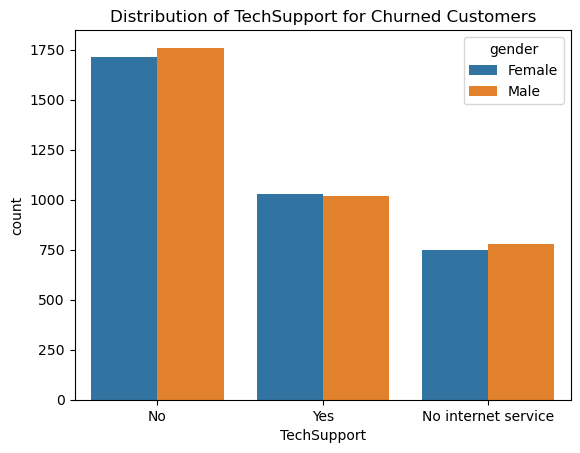

In [117]:
sns.countplot(df, x='TechSupport',hue='gender')
plt.title('Distribution of TechSupport for Churned Customers')
plt.show()

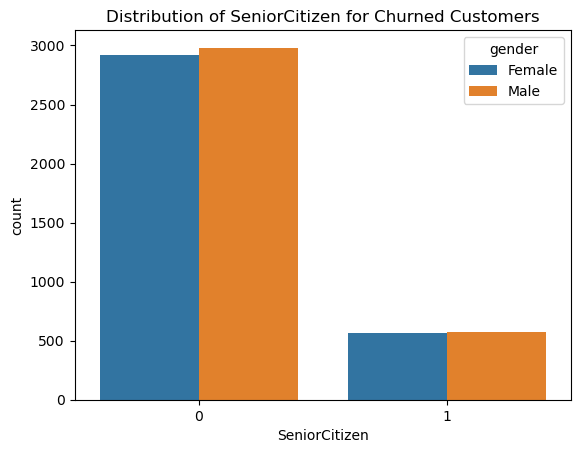

In [118]:
sns.countplot(df, x='SeniorCitizen',hue='gender')
plt.title('Distribution of SeniorCitizen for Churned Customers')
plt.show()

## CONCLUSION

###  These are some of the quick insights from this :

#### 1. Electronic check medium are the highest churners
#### 2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
#### 3. No Online security, No Tech Support category are high churners
#### 4. Non senior Citizens are high churners

### Converting data into csv file for Further Model Building part

In [136]:
df_dummies.to_csv("CCA_DATA_MB.csv")